In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    jaccard_score,
    hamming_loss,
    roc_curve,
    auc,
    precision_recall_fscore_support,
    matthews_corrcoef,
    zero_one_loss,
)
import time

In [ ]:
!pip install collections

In [ ]:
#Loading the Dataset
data = pd.read_csv("/content/kddcup99.csv")
data



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


In [ ]:
# Data Preprocessing
data = pd.get_dummies(data, columns=["protocol_type", "service", "flag"])
X = data.drop("label", axis=1)



In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Numeric columns for scaling
numeric_columns = [
    'duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
    'urgent', 'hot','num_failed_logins','is_host_login','is_guest_login','count','srv_count',
    'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate'
]

# Use only the numeric columns for scaling
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Use LabelEncoder for encoding the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["label"])
labels = label_encoder.classes_

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Numeric columns for scaling
numeric_columns = [
    'duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
    'urgent', 'hot','num_failed_logins','is_host_login','is_guest_login','count','srv_count',
    'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate'
]

# Identify non-numeric values and replace them or handle them appropriately
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Use only the numeric columns for scaling
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Use LabelEncoder for encoding the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["label"])
labels = label_encoder.classes_


In [ ]:
y = label_encoder.fit_transform(data.loc[X.index]["label"])


In [ ]:


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("Length of X:", len(X))
print("Length of y:", len(y))


Length of X: 494020
Length of y: 494020


In [ ]:
X_train = data[numeric_columns].loc[X_train.index]


In [ ]:
X_train[numeric_columns] = X_train[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [ ]:
print(X_train.isnull().sum())


duration                       0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
dtype: int64


In [ ]:
# Assuming num_features contains only numeric column names
numeric_columns = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
    'urgent', 'hot','num_failed_logins','is_host_login','is_guest_login','count','srv_count',
    'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate']  # Replace with your actual numeric column names

# Use only the numeric columns for scaling
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


# Use LabelEncoder for encoding the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["label"])
labels = label_encoder.classes_

# Select features only from numeric columns
X = data[numeric_columns]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Model Training
clf = RandomForestClassifier()
start_time = time.time()
clf.fit(X_train, y_train)
training_time = time.time() - start_time

In [ ]:
# Model Prediction
start_time = time.time()
y_pred = clf.predict(X_test)
prediction_time = time.time() - start_time

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  431     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]
 [    0     7     0     0     0     0     0     0     0     0     0     4
      0     0     0     0     0     0     0     0     0]
 [    0     0     1     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]
 [    0     0     0     7     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     2     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   262     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     1     0     0     1     0     1
      0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     2
      0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       431
           1       0.88      0.64      0.74        11
           2       1.00      1.00      1.00         1
           3       1.00      0.88      0.93         8
           4       1.00      0.67      0.80         3
           5       0.99      1.00      0.99       263
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00     21408
          10       1.00      0.96      0.98        45
          11       1.00      1.00      1.00     19366
          12       0.00      0.00      0.00         1
          14       0.98      0.98      0.98        41
          15       1.00      0.99      0.99       221
          16       0.00      0.00      0.00         1
          17       1.00      0.99      0.99       305
          18       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluation Metrics Calculation
mapped_labels = label_encoder.inverse_transform(y_pred)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
accuracy = accuracy_score(y_test, y_pred)
jaccard_score_val = jaccard_score(y_test, y_pred, average="weighted")
hamming_loss_val = hamming_loss(y_test, y_pred)
matthews_corrcoef_val = matthews_corrcoef(y_test, y_pred)
zero_one_loss_val = zero_one_loss(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


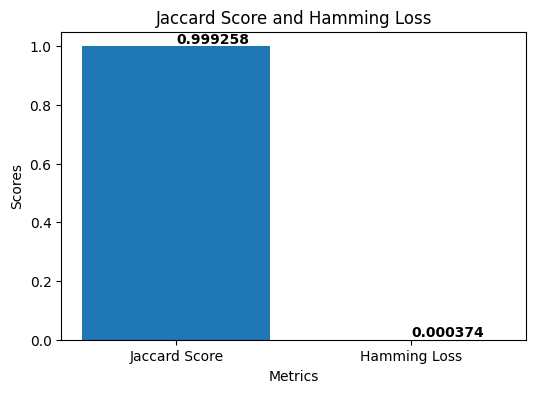

In [ ]:
#Plotting Jaccard Score and Hamming Loss
#what is jaccard score - measure seim;arity between two sets
#hamming loss - it is the fraction of the wrong labels to the total number of labels
plt.figure(figsize=(6, 4))
metrics = ["Jaccard Score", "Hamming Loss"]
scores = [jaccard_score_val, hamming_loss_val]

plt.bar(metrics, scores)
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, "{:.6f}".format(score), color="black", fontweight="bold")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Jaccard Score and Hamming Loss")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


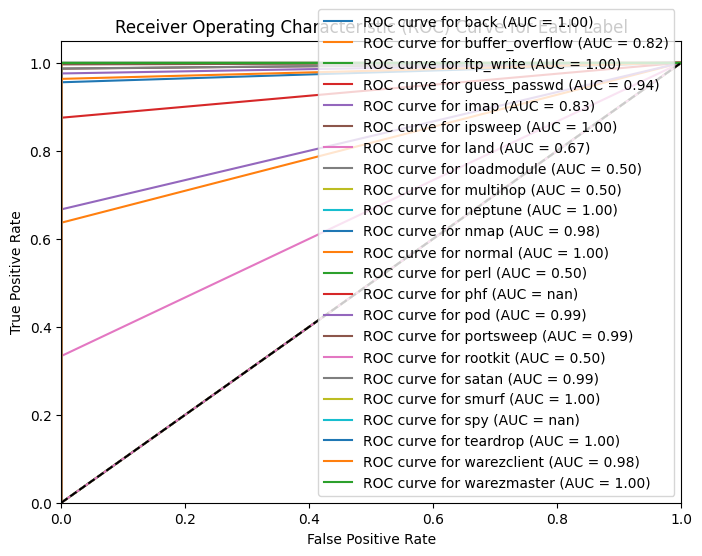

In [ ]:
# Plotting ROC Curve
fpr = {}
tpr = {}
roc_auc = {}

for label in labels:
    binary_true_labels = np.where(y_test == label_encoder.transform([label])[0], 1, 0)
    binary_pred_labels = np.where(y_pred == label_encoder.transform([label])[0], 1, 0)
    fpr[label], tpr[label], _ = roc_curve(binary_true_labels, binary_pred_labels)
    roc_auc[label] = auc(fpr[label], tpr[label])

plt.figure(figsize=(8, 6))
for label in labels:
    plt.plot(
        fpr[label],
        tpr[label],
        label="ROC curve for {} (AUC = {:.2f})".format(label, roc_auc[label]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for Each Label")
plt.legend(loc="lower right")
plt.show()